In [1]:
# Task 1,2
import pandas as pd
df = pd.read_csv("lab2_data.csv",sep=";",parse_dates=["data"],dayfirst=True)

In [2]:
df.dtypes

data    datetime64[ns]
USD            float64
CAD            float64
EUR            float64
dtype: object

In [3]:
df.head()

,data,USD,CAD,EUR
0,2024-10-15,96.1021,69.8366,105.4854
1,2024-10-12,96.0686,69.8478,105.1095
2,2024-10-11,97.2394,71.0295,106.5074
3,2024-10-10,96.9483,70.9880,106.4175
4,2024-10-09,96.1079,70.6208,105.6891


In [4]:
#!pip install statsmodels matplotlib scikit-learn

In [5]:
# Task 3
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=StandardScaler()

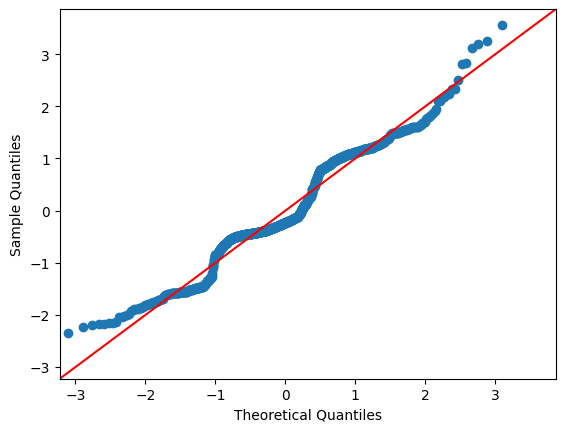

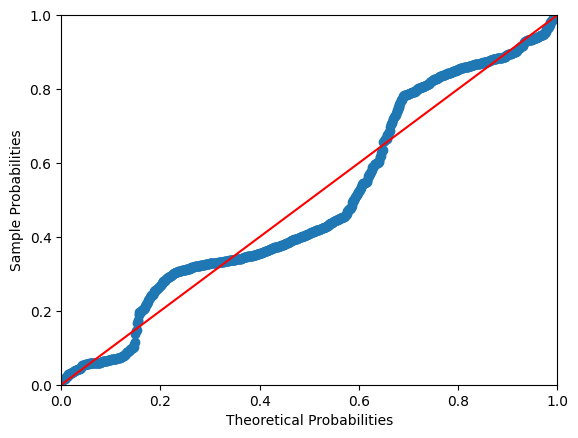

In [6]:

x = scaler.fit_transform(df[["USD"]])
df["USD"] = x[0:]
probplot_usd = sm.ProbPlot(df["USD"])
probplot_usd.qqplot(line="45")
probplot_usd.ppplot(line="45")
plt.show()



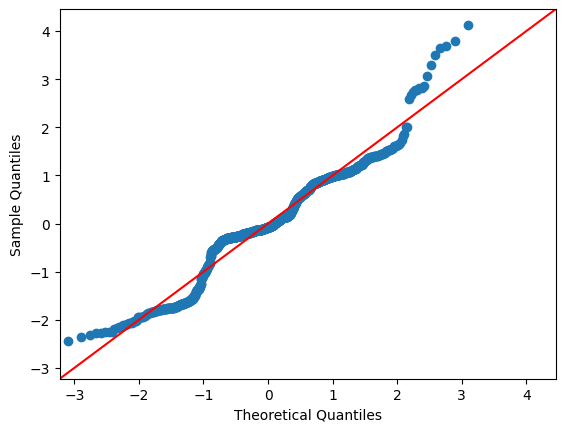

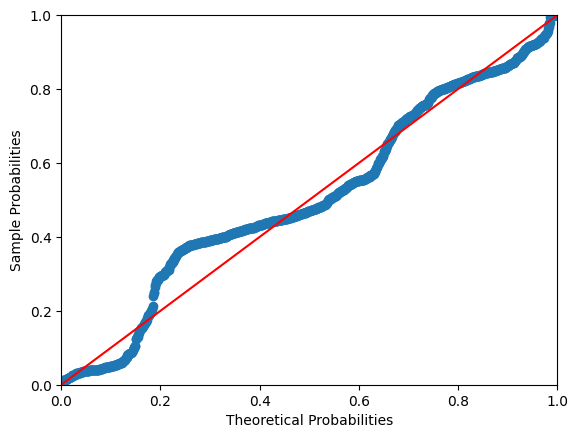

In [7]:
x = scaler.fit_transform(df[["CAD"]])
df["CAD"] = x[0:]
probplot_cad = sm.ProbPlot(df["CAD"])
probplot_cad.qqplot(line="45")
probplot_cad.ppplot(line="45")
plt.show()

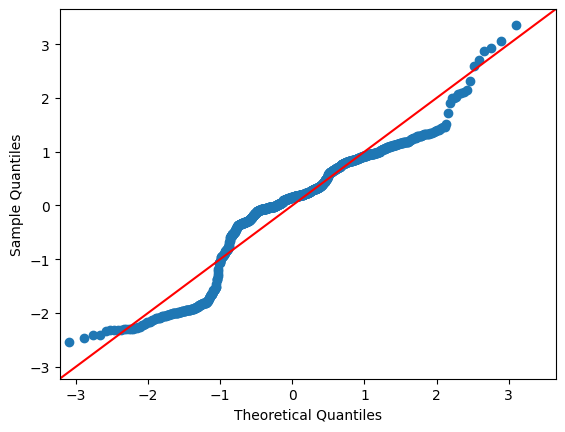

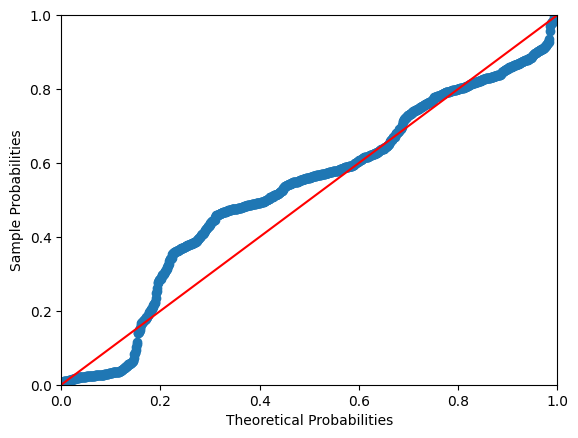

In [8]:
x = scaler.fit_transform(df[["EUR"]])
df["EUR"] = x[0:]
probplot_eur = sm.ProbPlot(df["EUR"])
probplot_eur.qqplot(line="45")
probplot_eur.ppplot(line="45")
plt.show()

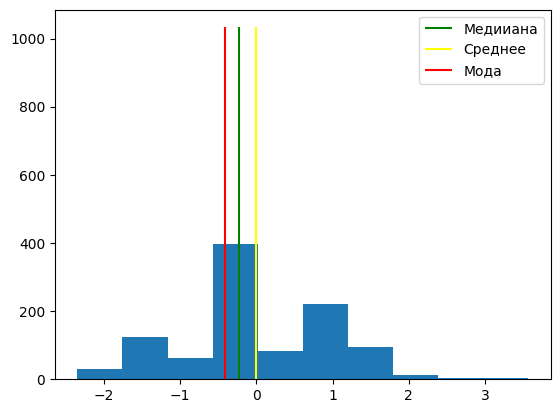

In [9]:
# TASK 4
plt.hist(df["USD"])
plt.vlines(df["USD"].median(),0,df["USD"].size,color="green",label="Медииана")
plt.vlines(df["USD"].mean(),0,df["USD"].size,color="yellow",label="Среднее")
plt.vlines(df["USD"].mode()[0],0,df["USD"].size,color="red",label="Мода")
plt.legend()

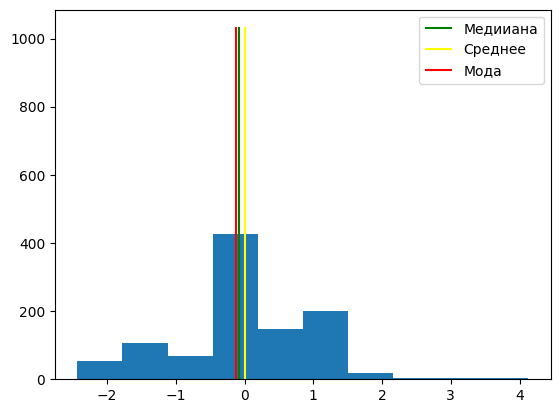

In [10]:
plt.hist(df["CAD"])
plt.vlines(df["CAD"].median(),0,df["CAD"].size,color="green",label="Медииана")
plt.vlines(df["CAD"].mean(),0,df["CAD"].size,color="yellow",label="Среднее")
plt.vlines(df["CAD"].mode()[0],0,df["CAD"].size,color="red",label="Мода")
plt.legend()

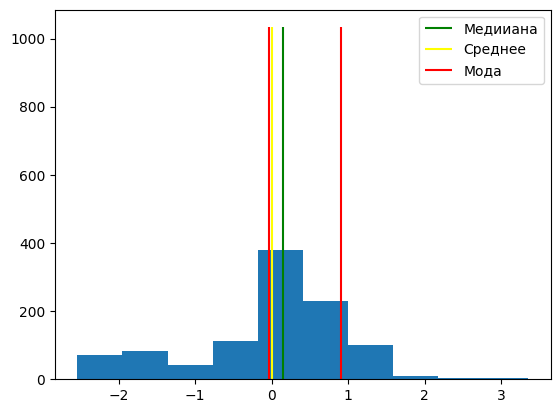

In [38]:
plt.hist(df["EUR"])
plt.vlines(df["EUR"].median(),0,df["EUR"].size,color="green",label="Медииана")
plt.vlines(df["EUR"].mean(),0,df["EUR"].size,color="yellow",label="Среднее")
plt.vlines(df["EUR"].mode(),0,df["EUR"].size,color="red",label="Мода")
plt.legend()

# Task 5

Выбор критерия нормальности делается в зависимости от выборки:
    7-2000 наблюдений – критерий Шапиро-Уилка 
    > 2000 наблюдений – подходят методы на основе эмпирической функции 
распределения (EDF):
- для большого числа отклонений в хвостах – критерий Андерсона-Дарлинга;
- для большого числа отклонений в середине – критерий Колмогорова-Смирнова

In [12]:
df["USD"].size

1033

In [13]:
# Применяем критерий Шапиро-Уилка
from scipy.stats import shapiro,norm,zscore
w_usd = shapiro(df["USD"])
w_cad = shapiro(df["CAD"])
w_eur = shapiro(df["EUR"])
print(f"USD : p-value= {w_usd[1]}")
print(f"CAD : p-value= {w_cad[1]}")
print(f"EUR : p-value= {w_eur[1]}")
# p-value мало везде, ни одно из распределений не является нормальнымa

USD : p-value= 2.850434538960153e-15
CAD : p-value= 1.854371715451316e-16
EUR : p-value= 2.842452986315541e-22


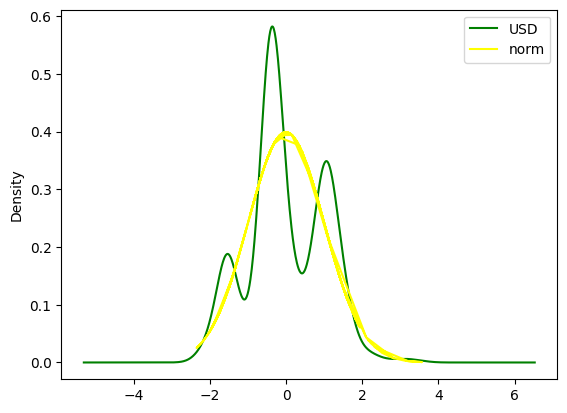

In [14]:
#df["CAD"].plot.kde(color="red",label="CAD")
df["USD"].plot.kde(color="green",label="USD")
#df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["USD"],norm.pdf(df["USD"],df["USD"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

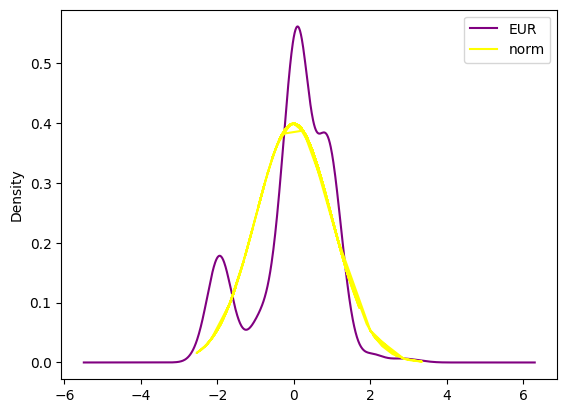

In [15]:
#df["CAD"].plot.kde(color="red",label="CAD")
#df["USD"].plot.kde(color="green",label="USD")
df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["EUR"],norm.pdf(df["EUR"],df["EUR"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

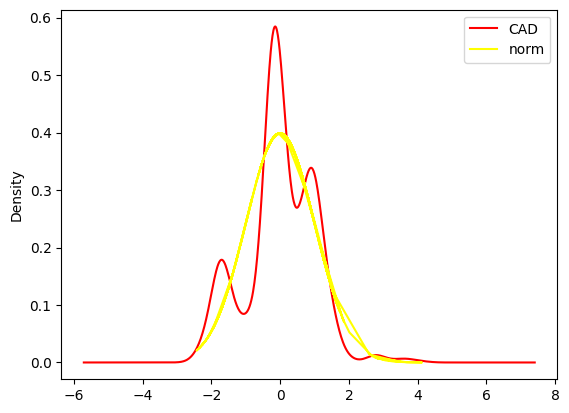

In [16]:
df["CAD"].plot.kde(color="red",label="CAD")
#df["USD"].plot.kde(color="green",label="USD")
#df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["CAD"],norm.pdf(df["CAD"],df["CAD"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

<Axes: >

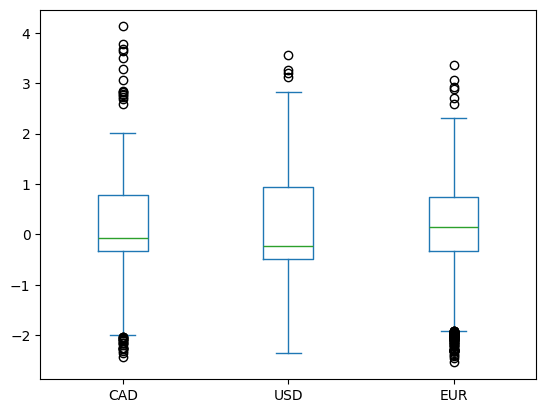

In [17]:
# TASK 6
df[["CAD","USD","EUR"]].plot.box()

In [18]:
import numpy as np


z = zscore(df[["USD", "CAD", "EUR"]])
# print(z.head())

z_mask = (np.abs(z) < 3).all(axis=1)

df_z = df[z_mask]
# print(df.shape, df_z.shape)

w_usd_z = shapiro(list(df_z["USD"]))
w_cad_z = shapiro(list(df_z["CAD"]))
w_eur_z = shapiro(list(df_z["EUR"]))

# print(f"USD : p-value= {w_usd_z[1]}")
# print(f"CAD : p-value= {w_cad_z[1]}")
# print(f"EUR : p-value= {w_eur_z[1]}")


In [19]:
# x = df[df["CAD"] > df["CAD"].quantile(0.25)]
# cad_filtered = x[x["CAD"] < x["CAD"].quantile(0.75)]


# y = df[df["USD"] > df["USD"].quantile(0.25)]
# usd_filtered = y[y["USD"] < y["USD"].quantile(0.75)]

# z = df[df["EUR"] > df["EUR"].quantile(0.25)]
# eur_filtered = z[z["EUR"] < z["EUR"].quantile(0.75)]



In [20]:
# shapiro(usd_filtered["USD"])

In [21]:
# shapiro(eur_filtered["EUR"])

In [22]:
# shapiro(cad_filtered["CAD"])

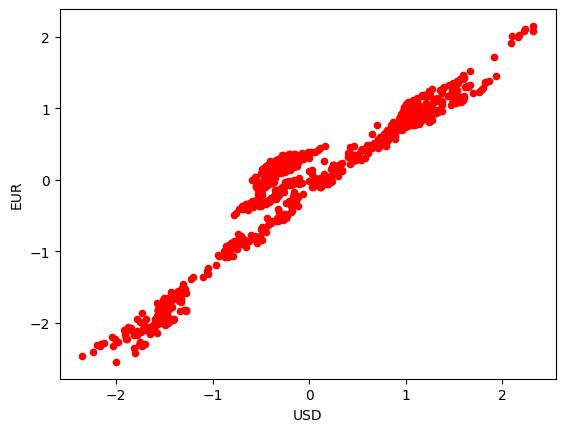

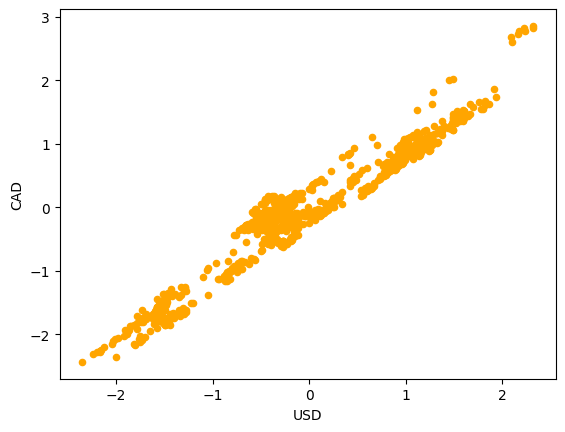

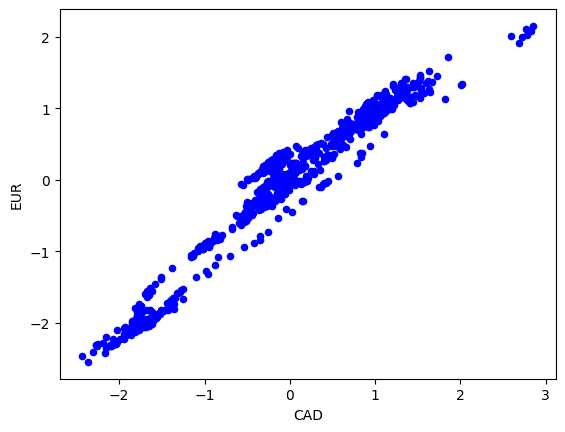

In [23]:
# Task 7
df_z.plot.scatter(x = 'USD', y = 'EUR', c = 'Red')
df_z.plot.scatter(x = 'USD', y = 'CAD', c = 'Orange')
df_z.plot.scatter(x = 'CAD', y = 'EUR', c = 'Blue')
plt.show()

In [24]:
#Task 8
from scipy.stats import pearsonr,spearmanr,kendalltau

In [25]:
pr1 = pearsonr(df_z["USD"],df_z["CAD"])
sp1 = spearmanr(df_z["USD"],df_z["CAD"])
k1 = kendalltau(df_z["USD"],df_z["CAD"])
print(pr1)
print(sp1)
print(k1)

PearsonRResult(statistic=np.float64(0.9689863243530407), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.938759731036203), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.8087265106333671), pvalue=np.float64(0.0))


In [26]:
pr2 = pearsonr(df_z["USD"],df_z["EUR"])
sp2 = spearmanr(df_z["USD"],df_z["EUR"])
k2 = kendalltau(df_z["USD"],df_z["EUR"])
print(pr2)
print(sp2)
print(k2)

PearsonRResult(statistic=np.float64(0.9416358000618057), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.9363941978559245), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.8097599475111705), pvalue=np.float64(0.0))


In [27]:
pr3 = pearsonr(df_z["EUR"],df_z["CAD"])
sp3 = spearmanr(df_z["EUR"],df_z["CAD"])
k3 = kendalltau(df_z["EUR"],df_z["CAD"])
print(pr3)
print(sp3)
print(k3)

PearsonRResult(statistic=np.float64(0.9718199266630831), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.9456498776007424), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.8241168376845004), pvalue=np.float64(0.0))


In [28]:
## Нам подходит спирмен или кендалл
## корелляция есть и во всех случаях, прямая и достаточно сильная

In [29]:
# temp = usd_filtered[["data","USD"]].set_index("data").join(eur_filtered[["data","EUR"]].set_index("data"))

In [30]:
# pooled = temp.join(cad_filtered[["data","CAD"]].set_index("data"))

In [31]:
# pooled.dropna(subset=["EUR","USD","CAD"],inplace=True)

In [34]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='USD', ylabel='EUR'>

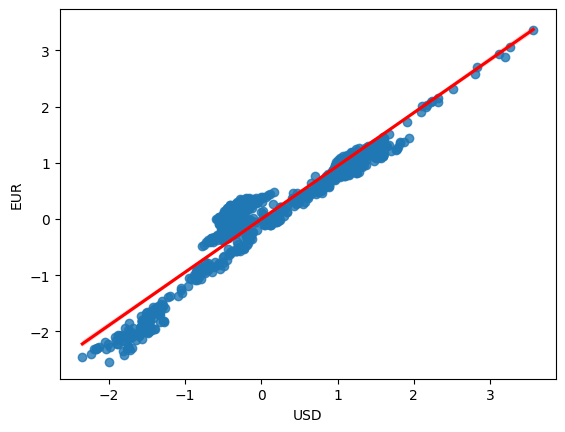

In [35]:
# Task 
import seaborn as sns
sns.regplot(data=df,x="USD",y="EUR",line_kws={"color":"red"})

<Axes: xlabel='USD', ylabel='CAD'>

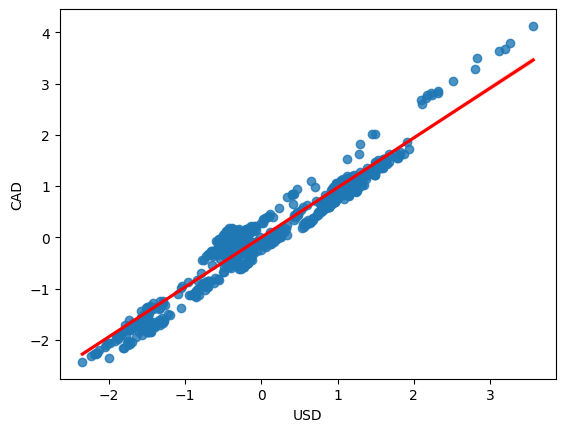

In [36]:
sns.regplot(data=df,x="USD",y="CAD",line_kws={"color":"red"})

<Axes: xlabel='EUR', ylabel='CAD'>

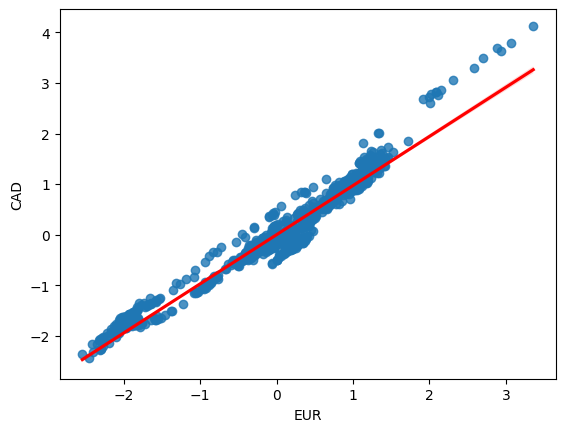

In [37]:
sns.regplot(data=df,x="EUR",y="CAD",line_kws={"color":"red"})